# Week 10: Motion Detection 

<font size="6"> Laboratory 9 </font> <br>
<font size="3"> Last updated August 17, 2022 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- Type here
    
<font size="5"> Programming Skills </font>
- Type here
    
<font size="5"> Embedded Systems </font>
- Thonny and Micropython

## <span style="color:orange;"> 0. Required Hardware </span>
- Microcontroller: Raspberry Pi Pico
- Breadboard
- USB connector
- Camera
- RGB color sensor (TCS3472)

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** me 

**Email:** me @purdue.edu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## <span style="color:orange;"> 1. Detecting Motion </span>

During the previous lab, you learned how to display the optical flow between the frames of a video and how to set up a camera using the Raspberry Pi Pico. For this lab, we will be focusing on using the camera and analyzing the video that it provides. 

Set up your camera using the instructions from last week's lab. After it is set up, try Exercise 1 using what you learned last week. As a reminder, OpenCV is used for images and videos in Python, so remember to make use of this. You may want to look up commands to help during this lab.

Rerun the following cells as you did in the previous lab:

In [2]:
import time
import serial
from serial.tools import list_ports

PICO_HWID = "2E8A"


def get_pico_port():
    pico_ports = list(list_ports.grep(PICO_HWID))
    if len(pico_ports) == 0:
        raise Exception(
            "No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it"
        )
    return pico_ports[0].device


print("Here are all the serial devices detected:")
for port in list_ports.comports():
    print(port.device, port.hwid)

port = get_pico_port()
print(f"\nselected port {port} as most likely to have a raspberry pi pico")

Here are all the serial devices detected:
/dev/ttyS1 n/a
/dev/ttyS0 PNP0501
/dev/ttyACM0 USB VID:PID=2E8A:000A SER=E66118604B6E1821 LOCATION=3-1:1.0

selected port /dev/ttyACM0 as most likely to have a raspberry pi pico


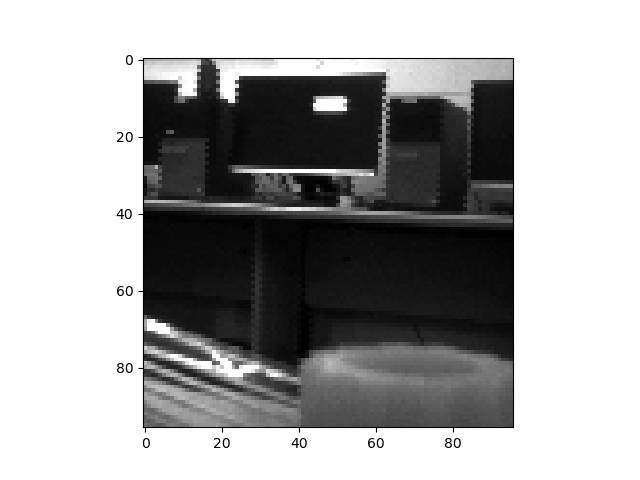

In [6]:
buffer = bytearray(96 * 96)
img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img.flat[::-1] = buffer

plt.imshow(img, cmap="gray")
plt.show()

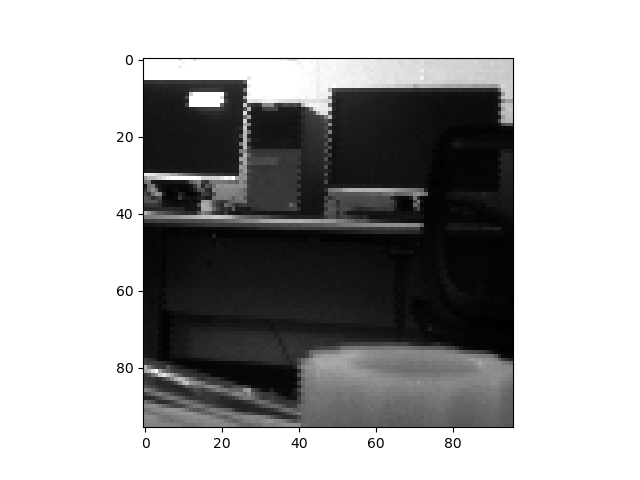

In [9]:
%matplotlib widget

fig, ax = plt.subplots()
render = ax.imshow(img, cmap='gray')
plt.show(block=False)

In [10]:
try:
    with serial.Serial(port, timeout=1) as s:
        while True:
            s.read_until(b"\x55\xAA")
            s.readinto(buffer)
            img.flat[::-1] = buffer
            render.set_data(img)
            fig.canvas.draw()
except KeyboardInterrupt:
    pass

Remember that when you are done, you will have to hit the `Interrupt Kernel` button, which can found at the top of the screen (the stop symbol) or under Kernel.

### <span style="color:red"> Exercise 1 </span>

**Part 1**

With your camera set up, record a video of objects moving whether it be you, your neighbor, your hand, a pen, etc. Use Farneback's algorithm and our visualization method to display the optical flow.

**Part 2**

Can you think of a (mathematical) rule to tell when an object enters the camera's view? (*Hint: thresholding*)

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Part 1 Below </h3>

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Part 2 Below </h3>

Now that you have analyzed a video obtained from using the camera, you will be analyzing the video in real time to detect motion. You can use any method to do this, whether it be Farneback's algorithm to determine the differences between frames, your answer to Exercise 1 Part 2, or anything else you can think of. 

### <span style="color:red"> Exercise 2 </span>

Using your camera, detect motion in real time. You can decide how to display that movement has been detected on the camera, such as having Python print a statement or having the Pico's onboard LED light up briefly. 

<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Below </h3>

Since you can detect motion, next you will be analyzing the motion to try and determine which direction the movement is occurring in (i.e. towards/away from the camera, to the right/left).

### <span style="color:red"> Exercise 3 </span>

Analyze the motion in real time and display which direction the movement is occurring in. This can be limited to forward, back, right, left.

*Hint*: Compare the frames and determine where there are differences between them.

<h3 style="background-color:lightblue"> Write Answers for Exercise 3 Below </h3>